In [55]:
# load the packages 
import pandas as pd
import numpy as np
from scipy import spatial
import datetime

import beautifultools as bt
import qgrid
from pandas.core.common import flatten
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats
import spacy

from collections import Counter
import random
random.seed(3)

from sklearn.preprocessing import normalize
from RandomWalk import random_walk
import re
import string
import nltk
nltk.data.path.append('/home/ec2-user/SageMaker/nltk_data/')

## 1. Pretrained Embedding

In [56]:
# import the seeds
bad = pd.read_csv('wsj_negative_lag1.csv')
good = pd.read_csv('wsj_positive_lag1.csv')

In [57]:
# import the pretrained embedding
w_embed = pd.read_csv("pre_embedding.csv")
w_embed.drop('Unnamed: 0', inplace = True, axis = 1)

w_embed = w_embed.dropna(axis='columns')
words = w_embed.columns.values

embeddings = w_embed.T.values


normalize(embeddings, copy=False)

array([[-0.08249189,  0.01167151, -0.10107464, ..., -0.04933412,
        -0.01598175,  0.04746702],
       [-0.0010394 ,  0.03656485, -0.00081964, ...,  0.1107814 ,
        -0.00825955, -0.09981602],
       [ 0.01060743,  0.01025556, -0.01155049, ..., -0.00607439,
        -0.04853532, -0.03358128],
       ...,
       [-0.00112163,  0.01868573,  0.06130268, ...,  0.03201686,
        -0.02291513,  0.04575155],
       [ 0.08371475,  0.04257114,  0.09292691, ..., -0.05961479,
         0.01807887, -0.07066598],
       [-0.02616378,  0.03762512,  0.15267952, ...,  0.02187933,
        -0.03589194, -0.01210936]])

### 1.1 Pretrained Embedding  (F + F)

In [58]:
good_words = np.reshape(good[good['Comment'] != 'Yellow']['word'].values, -1)
bad_words = np.reshape(bad[bad['Comment'] != 'Yellow']['word'].values, -1)

In [59]:
## Sentiprop
polarities = random_walk(words, embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

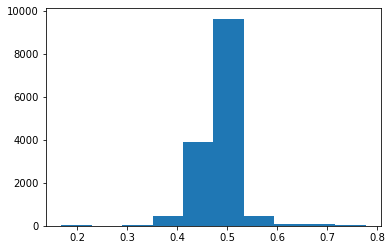

In [60]:
plt.hist(polarities.values())
plt.show()

In [61]:
polarities_df.to_csv("SentiProp11.csv", index = False)

### 1.2. Pretrained Embedding (NF + F)

In [62]:
good_words = np.reshape(good['word'].values, -1)
bad_words = np.reshape(bad[bad['Comment'] != 'Yellow']['word'].values, -1)

In [63]:
## Sentiprop
polarities = random_walk(words, embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

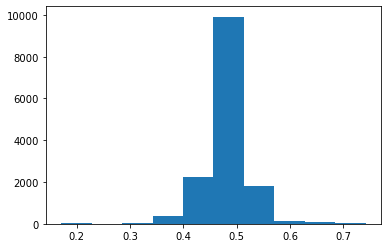

In [64]:
plt.hist(polarities.values())
plt.show()

In [65]:
polarities_df.to_csv("SentiProp12.csv", index = False)

### 1.3. Pretrained Embedding (F + NF)

In [66]:
good_words = np.reshape(good[good['Comment'] != 'Yellow']['word'].values, -1)
bad_words = np.reshape(bad['word'].values, -1)

In [67]:
## Sentiprop
polarities = random_walk(words, embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

In [68]:
polarities_df.to_csv("SentiProp13.csv", index = False)

### 1.4. Pretrained Embedding (NF + NF)

In [69]:
good_words = np.reshape(good['word'].values, -1)
bad_words = np.reshape(bad['word'].values, -1)

In [70]:
## Sentiprop
polarities = random_walk(words, embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

In [71]:
polarities_df.to_csv("SentiProp14.csv", index = False)

## 2. Self-trained Embedding

In [72]:
self_embed = pd.read_csv("self_embedding.csv")
self_embed.drop('Unnamed: 0', inplace = True, axis = 1)

self_embed = self_embed.dropna(axis='columns')
s_words = self_embed.columns.values

s_embeddings = self_embed.T.values


normalize(s_embeddings, copy=False)

array([[-0.09323193,  0.01690682,  0.03839168, ...,  0.0783374 ,
         0.0028675 ,  0.1383232 ],
       [ 0.13629262, -0.0232656 , -0.25623534, ...,  0.18320877,
         0.02720927, -0.19735112],
       [ 0.09858884, -0.04366817, -0.14795948, ..., -0.05736457,
         0.07284397,  0.01853995],
       ...,
       [-0.16276196, -0.04732764,  0.17595766, ...,  0.14430101,
        -0.08142769,  0.25215587],
       [-0.13486462,  0.22444564,  0.09924496, ..., -0.02964717,
         0.11223985, -0.22036555],
       [-0.15014536,  0.42754374,  0.07689856, ...,  0.08554885,
         0.23197712,  0.02511311]])

### 2.1 Self-trained Embedding  (F + F)

In [73]:
good_words = np.reshape(good[good['Comment'] != 'Yellow']['word'].values, -1)
bad_words = np.reshape(bad[bad['Comment'] != 'Yellow']['word'].values, -1)

## Sentiprop
polarities = random_walk(s_words, s_embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

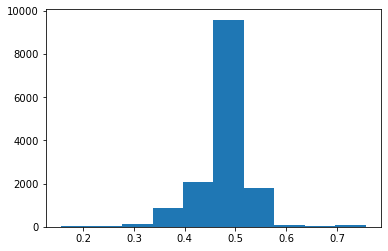

In [74]:
plt.hist(polarities.values())
plt.show()

In [75]:
polarities_df.to_csv("SentiProp21.csv", index = False)

### 2.2 Self-trained Embedding  (NF + F)

In [76]:
good_words = np.reshape(good['word'].values, -1)
bad_words = np.reshape(bad[bad['Comment'] != 'Yellow']['word'].values, -1)

## Sentiprop
polarities = random_walk(s_words, s_embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

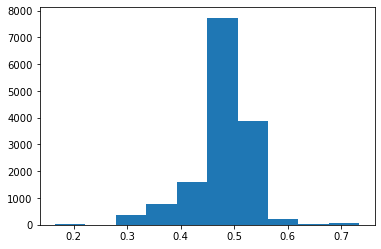

In [77]:
plt.hist(polarities.values())
plt.show()

In [78]:
polarities_df.to_csv("SentiProp22.csv", index = False)

### 2.3 Self-trained Embedding  (F + NF)

In [79]:
good_words = np.reshape(good[good['Comment'] != 'Yellow']['word'].values, -1)
bad_words = np.reshape(bad['word'].values, -1)

## Sentiprop
polarities = random_walk(s_words, s_embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

In [81]:
polarities_df.to_csv("SentiProp23.csv", index = False)

### 2.4 Self-trained Embedding  (NF + NF)

In [82]:
good_words = np.reshape(good['word'].values, -1)
bad_words = np.reshape(bad['word'].values, -1)

## Sentiprop
polarities = random_walk(s_words, s_embeddings, good_words, bad_words, beta=0.99, nn=25, arccos=False)

polarities_df = pd.DataFrame(polarities.items())
polarities_df.columns = ["words", "polarity"]
polarities_df.sort_values("polarity",inplace = True)

In [83]:
polarities_df.to_csv("SentiProp24.csv", index = False)